In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LinearRegression:
    def __init__(self):
        self.coefficients = None
        
    def fit(self, X,y):
        #Add bias term (intercept) of 1 to the data as the first column
        intercepts = np.ones((len(X),1))
        X = np.concatenate((intercepts, X), axis = 1)
        
        #Calculate coefficients of the model using normal equation
        X_T = np.transpose(X)
        X_T_X = np.dot(X_T, X)
        
        try:
            X_T_X_inv = np.linalg.inv(X_T_X)
        except np.linalg.LinAlgError:
            raise ValueError("Matrix inversion failed. Check if the matrix is singular.")
            
        X_T_y = np.dot(X_T,y)
        self.coefficients = np.dot(X_T_X_inv, X_T_y)
        
    
    def predict(self, X):
        intercepts = np.ones((len(X),1))
        X = np.concatenate((intercepts, X), axis = 1)
        return np.dot(X,self.coefficients)
    
    def R_squared(self, X, y):
        y_pred = self.predict(X)
        SS_res = np.sum((y-y_pred)**2)
        SS_tot = np.sum((y - np.mean(y))**2)
        R_square = 1 - SS_res/SS_tot
        return R_square
        

## Create sample data

In [3]:
# Number of samples
n_samples = 100

# Generate random data for the independent variable (X)
X = 2 * np.random.rand(n_samples, 1)

# Define the true slope (m) and intercept (b)
m = 2.5  # slope
b = 1.5  # intercept

# Generate the dependent variable (y) using the linear equation y = mX + b + noise
noise = 0.2*np.random.randn(n_samples, 1)  # add some noise
y = m * X + b + noise

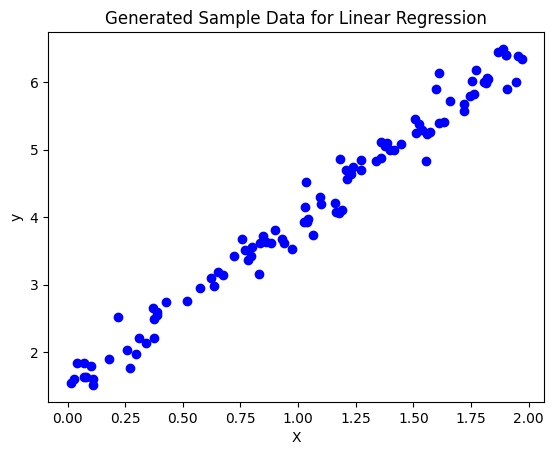

In [4]:
# Visualize the sample data
plt.scatter(X, y, label="Data Points", color='blue')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Generated Sample Data for Linear Regression")
plt.show()

# Create and fit the model

In [5]:
model = LinearRegression()
model.fit(X,y)
# Predictions
y_pred = model.predict(X)
# R-squared
r2 = model.R_squared(X,y)
print(f"R-squared: {r2:.4f}")
# Coefficients
print("Coefficients:", model.coefficients)

R-squared: 0.9801
Coefficients: [[1.47678762]
 [2.50802542]]


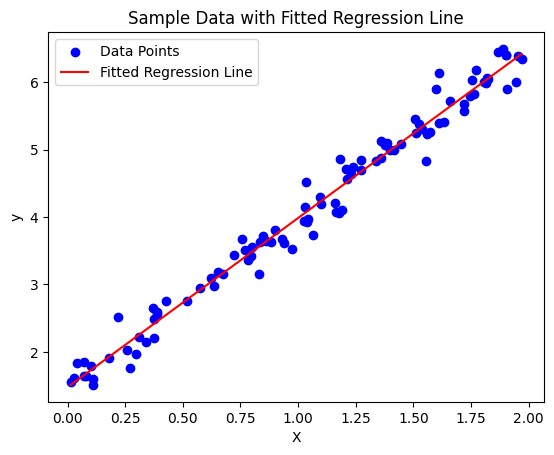

In [6]:
# Generate predictions for the regression line
X_line = np.linspace(min(X), max(X), 100)  # Create an array of values for X
y_pred = model.predict(X_line)

# Visualize the sample data and the fitted regression line
plt.scatter(X, y, label="Data Points", color='blue')
plt.plot(X_line, y_pred, color='red', label="Fitted Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Sample Data with Fitted Regression Line")
plt.legend()
plt.show()

# Normal Equation
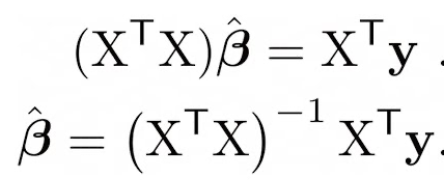

# R-square calculation
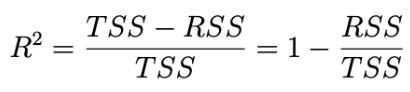

# Residual sum of squares
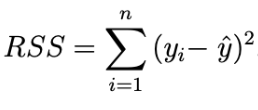

# Total sum of squares
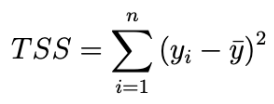